<a href="https://colab.research.google.com/github/sreramk1/sentiment-analysis/blob/main/Sentiment_analysis_experiment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np

import tensorflow_datasets as tfds
import tensorflow as tf

#tfds.disable_progress_bar()

In [2]:
tf.version.VERSION

'2.6.0'

In [3]:
import pandas as pd 

In [4]:
dataset = pd.read_csv("/content/drive/MyDrive/sentiment-dataset/airline_sentiment_analysis.csv")

In [5]:
print (dataset[:10])
print (dataset[len(dataset) - 10:])

   Unnamed: 0  ...                                               text
0           1  ...  @VirginAmerica plus you've added commercials t...
1           3  ...  @VirginAmerica it's really aggressive to blast...
2           4  ...  @VirginAmerica and it's a really big bad thing...
3           5  ...  @VirginAmerica seriously would pay $30 a fligh...
4           6  ...  @VirginAmerica yes, nearly every time I fly VX...
5           8  ...    @virginamerica Well, I didn't…but NOW I DO! :-D
6           9  ...  @VirginAmerica it was amazing, and arrived an ...
7          11  ...  @VirginAmerica I &lt;3 pretty graphics. so muc...
8          12  ...  @VirginAmerica This is such a great deal! Alre...
9          13  ...  @VirginAmerica @virginmedia I'm flying your #f...

[10 rows x 3 columns]
       Unnamed: 0  ...                                               text
11531       14627  ...  @AmericanAir Flight Cancelled Flightled, can't...
11532       14628  ...  Thank you. “@AmericanAir: @jlhalldc

In [6]:
def process(txt):
  return ' '.join(word for word in txt.split(' ') if not word.startswith('@'))

process(" word1 word2     word3 @word4 word5   word6")

' word1 word2     word3 word5   word6'

In [7]:
dataset_processed = pd.DataFrame.copy(dataset, deep=True)

dataset_processed['text'] = dataset['text'].apply(process)
print(dataset_processed[:3])
print(dataset_processed[len(dataset_processed) - 3:])


   Unnamed: 0  ...                                               text
0           1  ...  plus you've added commercials to the experienc...
1           3  ...  it's really aggressive to blast obnoxious "ent...
2           4  ...           and it's a really big bad thing about it

[3 rows x 3 columns]
       Unnamed: 0  ...                                               text
11538       14635  ...  thank you we got on a different flight to Chic...
11539       14636  ...  leaving over 20 minutes Late Flight. No warnin...
11540       14638  ...  you have my money, you change my flight, and d...

[3 rows x 3 columns]


In [8]:
from sklearn.model_selection import train_test_split

In [9]:
def process_label(label):
  if label == "negative":
    return 0
  elif label == "positive":
    return 1
  raise Exception("unrecognized label")

In [10]:
dataset_processed['airline_sentiment'] = dataset_processed['airline_sentiment'].apply(process_label)

In [11]:
dataset_train, dataset_test = train_test_split(dataset_processed, test_size = 0.2)

In [12]:
dataset_train[100:125]

Unnamed: 0  ...                                               text
1624         2054  ...  nice. I wonder how you pick who to respond to?...
4924         6375  ...                      hot stewardess flipped me off
9019        11629  ...  Commitment to excellence is 2b praised. Can ge...
9641        12404  ...  really? That's it? Not even a "we are looking ...
5349         6980  ...  three hours on s delayed flight staring a blan...
7322         9694  ...  you are absolutely terrible at managing these ...
11347       14416  ...  called executive platinum desk and got a TWO H...
3698         4663  ...  Just wanted 2 change an anytime flight leaving...
998          1318  ...  Stopped flying 1 yr ago bc of aggressive polic...
11440       14524  ...  can you do anything to get #AA953 moving? Been...
4746         6102  ...  I really appreciate you all's #BHM commercial ...
4473         5710  ...         why did you book my hotel twice?!?! Ahhhhh
5092         6589  ...  please PM me the number where I can lodge form...
10387       13303  ...  Thanks for the response.Tough night for all in...
6716         8974  ...  we were moved to a delta direct. Thank you for...
11427       14510  ...  been waiting in line for over an hour in San A...
4594         5868  ...  Oops...no functioning bathrooms on a fairly fu...
8395        10911  ...                                 835, fix this ASAP
1234         1594  ...  .@united in the future when delay causes 15 ho...
7620        10030  ...                  you should get better employees✌️
2650         3298  ...  So excited I was put on an earlier flight to g...
10709       13679  ...  make sure u insure your luggage as those assho...
5781         7615  ...  What can I say other than when it comes to my ...
4472         5709  ...                                         sure thing
11116       14157  ...  Why does your iPhone app not have any sort of ...

[25 rows x 3 columns]

In [13]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

In [14]:
dataset_train_text_tf = tf.convert_to_tensor(dataset_train['text'], dtype=tf.string)
dataset_train_label_tf = tf.convert_to_tensor(dataset_train['airline_sentiment'], dtype=tf.float32)

dataset_test_text_tf = tf.convert_to_tensor(dataset_test['text'], dtype=tf.string)
dataset_test_lable_tf = tf.convert_to_tensor(dataset_test['airline_sentiment'], dtype=tf.float32)

dataset_train_tf = tf.data.Dataset.from_tensor_slices((dataset_train_text_tf, dataset_train_label_tf))
dataset_test_tf = tf.data.Dataset.from_tensor_slices((dataset_test_text_tf, dataset_test_lable_tf))


In [23]:
count = 10
i = 0
for ele in dataset_train_tf.as_numpy_iterator():
  if i >= count: 
    break
  print (ele)
  i += 1

(b'Awesome - thanks!', 1.0)
(b'I agree but per the captain this issue happened before boarding &amp; we all sat in the plane for almost 2 hrs', 0.0)
(b'you guys are awesome! Thanks!', 1.0)
(b"I wish I would've known so I could've slept 2 hours more and let my friend know not to wait for me after she lands...", 0.0)
(b"has time to respond to everyone else's complaints but not mine. You just lost a customer", 0.0)
(b'us2118\nMy wife in Boston says no snow right now.', 0.0)
(b'good try but got her here safer and sooner', 0.0)
(b'On last flight of the day no less. I am now driving 4 hours to Aspen thru a snowstorm Thx to your teams lack of customer empathy', 0.0)
(b'needs to pay for my car. I could have been on my flight if 4 help desks did not say it already left. Shame.', 0.0)
(b'Filled out at the airport as part of a long day made longer.', 0.0)


In [24]:
train_dataset_batched_tf = dataset_train_tf.shuffle(BUFFER_SIZE).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset_batched_tf = dataset_test_tf.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

In [25]:
count = 1
i = 0
for ele in train_dataset_batched_tf.as_numpy_iterator():
  if i >= count: 
    break
  print (ele)
  i += 1

(array([b'so she has to take a Late Flightr flight booked by her corporate (Disney) travel dept, as your agent offered little help',
       b'tried a different flight IAH-MNL 4/1/15-4/17/15, 6 flights are advertised for $1038 but are not bookable (due to partner error).',
       b"if I wait I'll lose the flight. So frustrating.",
       b'Black History Commercial is really sweet. Well done.',
       b'tomorrows flight Cancelled Flighted. I understand. Three hour wait for a call back and now 60 minutes on hold. Not cool.',
       b"Thank you! I can't wait either :)",
       b'Not appropriate to ask in public (hence the dm). each united employee, each a new answer. your process was such a hassle i Cancelled Flighted.',
       b'appreciate the response but already spoke to a MCO and their response was "There is nothing we can do" idk if that\'s what you mean',
       b'I just received notification of in-flight Wi-Fi for UA863 from to Amazing!',
       b'Thanks for the champagne  AA153 ORD

In [26]:
print(dataset_train_tf)
print(dataset_test_tf)

<TensorSliceDataset shapes: ((), ()), types: (tf.string, tf.float32)>
<TensorSliceDataset shapes: ((), ()), types: (tf.string, tf.float32)>


In [27]:
#VOCAB_SIZE = 1000
encoder = tf.keras.layers.TextVectorization()
    #max_tokens=VOCAB_SIZE)
encoder.adapt(train_dataset_batched_tf.map(lambda text, label: text))

In [50]:
encoder("hello world HELLO WORLD")[:].numpy()

array([1103,  730, 1103,  730])

In [28]:
import matplotlib.pyplot as plt


def plot_graphs(history, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+metric], '')
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.legend([metric, 'val_'+metric])

In [29]:
vocab = np.array(encoder.get_vocabulary())
vocab[100:150]

array(['great', 'more', 'never', 'wait', 'fly', 'ive', 'trying', '3',
       'day', 'because', 'only', 'delay', 'really', '4', 'airport',
       'minutes', 'then', 'u', 'should', 'even', 'did', 'home', 'united',
       'agent', 'last', 'bags', 'people', 'luggage', 'very', 'any',
       'another', 'good', 'way', 'weather', 'going', 'know', 'off',
       'make', 'told', 'go', 'here', 'worst', 'than', 'flying', 'lost',
       'ever', 'due', 'them', 'take', 'seat'], dtype='<U46')

In [51]:
for example, label in dataset_train_tf.take(1):
  print('texts: ', example.numpy())
  print()
  print('labels: ', label.numpy())

texts:  b'Awesome - thanks!'

labels:  1.0


In [65]:
model = tf.keras.Sequential([
      encoder,
      tf.keras.layers.Embedding(
          input_dim=len(encoder.get_vocabulary()),
          output_dim=64,
          # Use masking to handle the variable sequence lengths
          mask_zero=True),
      tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
      tf.keras.layers.Embedding(
          input_dim=len(encoder.get_vocabulary()),
          output_dim=64,
          # Use masking to handle the variable sequence lengths
          mask_zero=True),
      tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
      tf.keras.layers.Dense(64, activation='relu'),
      tf.keras.layers.Dense(1) #, activation='sigmoid')
  ])

In [66]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
text_vectorization (TextVect (None, None)              0         
_________________________________________________________________
embedding_11 (Embedding)     (None, None, 64)          768192    
_________________________________________________________________
bidirectional_13 (Bidirectio (None, 128)               66048     
_________________________________________________________________
embedding_12 (Embedding)     (None, 128, 64)           768192    
_________________________________________________________________
bidirectional_14 (Bidirectio (None, 64)                24832     
_________________________________________________________________
dense_18 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_19 (Dense)             (None, 1)                

In [69]:
encoder("hello world. This is great").numpy()

array([1103,  730,   25,   12,  100])

In [ ]:
dataset_train_batched_text = np.array_split(dataset_train['text'],len(dataset_train['text'])/BATCH_SIZE)
dataset_train_batched_class = np.array_split(dataset_train['airline_sentiment'], len(dataset_train['airline_sentiment'])/BATCH_SIZE)

dataset_test_batched_text = np.array_split(dataset_test['text'],len(dataset_test['text'])/BATCH_SIZE)
dataset_test_batched_class = np.array_split(dataset_test['airline_sentiment'], len(dataset_test['airline_sentiment'])/BATCH_SIZE)


In [ ]:
print (len(dataset_train))
print (len(dataset_test))
print (" ------------------------  ")
print (len(dataset_train_batched_text))
print (len(dataset_train_batched_class))
print (len(dataset_train_batched_text[len(dataset_train_batched_text)- 1]))
print (len(dataset_train_batched_class[len(dataset_train_batched_text)- 1]))
print (" ------------------------  ")
print (len(dataset_test_batched_text))
print (len(dataset_test_batched_class))
print (len(dataset_test_batched_text[len(dataset_test_batched_text)- 1]))
print (len(dataset_test_batched_class[len(dataset_test_batched_class)- 1]))

9232
2309
 ------------------------  
144
144
64
64
 ------------------------  
36
36
64
64


In [ ]:
dataset_test_batched_text_tmp =  np.asarray(dataset_test_batched_text, dtype=object)
dataset_test_batched_class_tmp = np.asarray(dataset_test_batched_class, dtype=object)

dataset_train_batched_text_tmp =  np.asarray(dataset_train_batched_text, dtype=object)
dataset_train_batched_class_tmp = np.asarray(dataset_train_batched_class, dtype=object)

np_dataset_test_batched_text = []
np_dataset_test_batched_class = []
np_dataset_train_batched_text = []
np_dataset_train_batched_class = []

for itr in dataset_test_batched_text_tmp:
  np_dataset_test_batched_text.append(itr.to_numpy())

for itr in dataset_test_batched_class_tmp:
  np_dataset_test_batched_class.append(itr.to_numpy())


for itr in dataset_train_batched_text_tmp:
  np_dataset_train_batched_text.append(itr.to_numpy())

for itr in dataset_train_batched_class_tmp:
  np_dataset_train_batched_class.append(itr.to_numpy())


np_dataset_test_batched_text = np.asarray(np_dataset_test_batched_text, dtype=object)
np_dataset_test_batched_class = np.asarray(np_dataset_test_batched_class, dtype=object)
np_dataset_train_batched_text = np.asarray(np_dataset_train_batched_text, dtype=object)
np_dataset_train_batched_class = np.asarray(np_dataset_train_batched_class, dtype=object)

ValueError: ignored

In [ ]:
np_dataset_test_batched_text[len(np_dataset_test_batched_text)- 1][0]

'used to love you, but you keep rescheduling my flights.  #southworst'

In [ ]:
tf_dataset_test_batched_text = tf.data.Dataset.from_tensor_slices(np_dataset_test_batched_text)
tf_dataset_test_batched_text


ValueError: ignored

In [ ]:
VOCAB_SIZE = 1000
encoder = tf.keras.layers.TextVectorization()
    #max_tokens=VOCAB_SIZE)
encoder.adapt(np_dataset_train_batched_text)

ValueError: ignored

In [ ]:
import matplotlib.pyplot as plt


def plot_graphs(history, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+metric], '')
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.legend([metric, 'val_'+metric])


In [ ]:
dataset_2, info = tfds.load('imdb_reviews', with_info=True,
                          as_supervised=True)
train_dataset, test_dataset = dataset_2['train'], dataset_2['test']

train_dataset.element_spec

(TensorSpec(shape=(), dtype=tf.string, name=None),
 TensorSpec(shape=(), dtype=tf.int64, name=None))

In [ ]:
for example, label in train_dataset.take(1):
  print('text: ', example.numpy())
  print('label: ', label.numpy())


text:  b"This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it."
label:  0


In [ ]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64


In [ ]:
train_dataset = train_dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)


In [ ]:
train_dataset.as_numpy_iterator()

<PrefetchDataset shapes: ((None,), (None,)), types: (tf.string, tf.int64)>

In [ ]:
for example, label in train_dataset.take(1):
  print('texts: ', example.numpy()[:3])
  print()
  print('labels: ', label.numpy()[:])


texts:  [b"Eleven different Film Makers from different parts of the world are assembled in this film to present their views and ideas about the WTC attack. This is one of the best effort you will see in any Film. Films like this are rarely made and appreciated. This film tries to touch every possible core of WTC. Here are some of the most important stories from the film that makes this film so unique.<br /><br />There is the story from Samira Makhmalbaf (Iran) where somewhere in Iran people are preparing for the attacks from America. There a teacher is trying to educate her students by informing them about Innocent People being killed in WTC massacre. Then comes a story from Youssef Chahine (Egypt) where a Film Maker comes across face-to-face conversation with a Dead Soldier in the WTC attack and a Dead Hard Core Terrorist who was involved in WTC attack. Then we see a story from Idrissa Ouedraogo (Burkina Faso) where a group of Five Innocent children's sees Osama Bin Laden and plans to

In [ ]:
VOCAB_SIZE = 1000
encoder = tf.keras.layers.experimental.preprocessing.TextVectorization(
    max_tokens=VOCAB_SIZE)
encoder.adapt(train_dataset.map(lambda text, label: text))

In [ ]:
vocab = np.array(encoder.get_vocabulary())
vocab[:]

In [ ]:
encoded_example = encoder(example)[:3].numpy()
encoded_example

array([[  1, 267,  20, ...,   0,   0,   0],
       [218,   6, 321, ...,   0,   0,   0],
       [131,  11,  20, ...,   0,   0,   0]])

In [ ]:
for n in range(3):
  print("Original: ", example[n].numpy())
  print("Round-trip: ", " ".join(vocab[encoded_example[n]]))
  print()


Original:  b"Eleven different Film Makers from different parts of the world are assembled in this film to present their views and ideas about the WTC attack. This is one of the best effort you will see in any Film. Films like this are rarely made and appreciated. This film tries to touch every possible core of WTC. Here are some of the most important stories from the film that makes this film so unique.<br /><br />There is the story from Samira Makhmalbaf (Iran) where somewhere in Iran people are preparing for the attacks from America. There a teacher is trying to educate her students by informing them about Innocent People being killed in WTC massacre. Then comes a story from Youssef Chahine (Egypt) where a Film Maker comes across face-to-face conversation with a Dead Soldier in the WTC attack and a Dead Hard Core Terrorist who was involved in WTC attack. Then we see a story from Idrissa Ouedraogo (Burkina Faso) where a group of Five Innocent children's sees Osama Bin Laden and plans 

In [ ]:
import os
model2 = None
print(os.listdir('/content/drive/MyDrive/sentiment/'))
if len(os.listdir('/content/drive/MyDrive/sentiment/')) == 0:
  model = tf.keras.Sequential([
      encoder,
      tf.keras.layers.Embedding(
          input_dim=len(encoder.get_vocabulary()),
          output_dim=64,
          # Use masking to handle the variable sequence lengths
          mask_zero=True),
      tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
      tf.keras.layers.Dense(64, activation='relu'),
      tf.keras.layers.Dense(1, activation='sigmoid')
  ])
  print ("created model")
else:
  model2 = tf.keras.models.load_model ("/content/drive/MyDrive/sentiment/")
  print ("loaded model")

['variables', 'assets', 'saved_model.pb', 'keras_metadata.pb']


ValueError: ignored

In [ ]:
if model2 is not None:
  model = model2

In [ ]:
print([layer.supports_masking for layer in model.layers])


[False, True, True, True, True]


In [ ]:
# predict on a sample text without padding.

sample_text = ('The movie was cool. The animation and the graphics '
               'were out of this world. I would recommend this movie.')
predictions = model.predict(np.array([sample_text]))
print(predictions[0])


[0.5011921]


In [ ]:
# predict on a sample text with padding

padding = "the " * 2000
predictions = model.predict(np.array([sample_text, padding]))
print(predictions[0])


[0.5011921]


In [ ]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'], run_eagerly=True)


In [ ]:
history = model.fit(train_dataset, epochs=5,
                    validation_data=test_dataset,
                    validation_steps=30)


Epoch 1/5
391/391 [==============================] - 112s 285ms/step - loss: 0.6542 - accuracy: 0.6130 - val_loss: 0.5631 - val_accuracy: 0.7479
Epoch 2/5
391/391 [==============================] - 110s 279ms/step - loss: 0.4339 - accuracy: 0.8212 - val_loss: 0.4028 - val_accuracy: 0.8385
Epoch 3/5
391/391 [==============================] - 110s 280ms/step - loss: 0.3584 - accuracy: 0.8520 - val_loss: 0.3456 - val_accuracy: 0.8615
Epoch 4/5
391/391 [==============================] - 108s 274ms/step - loss: 0.3338 - accuracy: 0.8620 - val_loss: 0.3362 - val_accuracy: 0.8615
Epoch 5/5
391/391 [==============================] - 107s 271ms/step - loss: 0.3217 - accuracy: 0.8693 - val_loss: 0.3322 - val_accuracy: 0.8604


In [ ]:
test_loss, test_acc = model.evaluate(test_dataset)

print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)


391/391 [==============================] - 56s 143ms/step - loss: 0.3299 - accuracy: 0.8616
Test Loss: 0.3298826515674591
Test Accuracy: 0.8615999817848206


In [ ]:
# predict on a sample text without padding.

sample_text = ('good is great')
predictions = model.predict(np.array([sample_text]))
print(predictions)

sample_text = ('bad equals very bad. Worse')
predictions = model.predict(np.array([sample_text]))
print(predictions)


[[0.67209285]]
[[0.2071819]]


In [ ]:
x = tfds.as_numpy(test_dataset)

In [ ]:
for ele in train_dataset.as_numpy_iterator():
  print (ele)
  print ("---------------------")

(array([b'This movie does contradict the first one as far as the origins of the Care Bears and the Care Bear Cousins goes. I won\'t deny that. However, if you look at "Part II" as a separate film, then it\'s a very good movie. I remember watching this in the early 80\'s (and fitting into its targeted demographic audience then), and absolutely loving it much more than the first movie (not that I didn\'t enjoy that one too, it\'s just that this one seemed to have a little something extra to it). Sure it\'s darker than the first one too, but perhaps maybe that\'s why it\'s so good. And it\'s dark in deeper kind of subtle way too (that kids may not fully understand, but could still be a bit scared of because of the atmosphere it gives off, and adults watching will surely get quicker as I have now watching this film again now in my mid-twenties) where you basically have a young girl making a deal with an evil spirit/demon in exchange for something else. Get the picture? But simply watching 

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



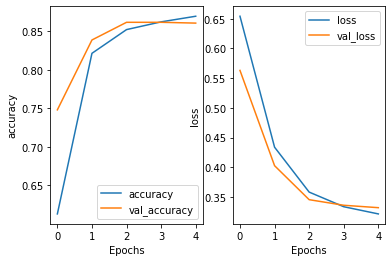

In [ ]:
?plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
plot_graphs(history, 'accuracy')
plt.subplot(1, 2, 2)
plot_graphs(history, 'loss')


In [ ]:
m = tf.keras.metrics.Accuracy()
m.update_state([[0], [2], [3], [4]], [[0], [2], [3], [4]])
m.result().numpy()

1.0

In [ ]:
import copy
vicab2 = copy.deepcopy(vocab)

In [ ]:
vicab2.sort()

In [ ]:
vicab2

array(['', '1', '10', '2', '20', '3', '4', '5', '70s', '80s', '[UNK]',
       'a', 'able', 'about', 'above', 'absolutely', 'across', 'act',
       'acting', 'action', 'actor', 'actors', 'actress', 'actual',
       'actually', 'add', 'admit', 'after', 'again', 'against', 'age',
       'ago', 'air', 'all', 'almost', 'alone', 'along', 'already', 'also',
       'although', 'always', 'am', 'amazing', 'america', 'american',
       'among', 'an', 'and', 'animation', 'annoying', 'another', 'any',
       'anyone', 'anything', 'anyway', 'apart', 'apparently', 'appear',
       'appears', 'are', 'arent', 'around', 'art', 'as', 'ask', 'at',
       'atmosphere', 'attempt', 'attempts', 'attention', 'audience',
       'average', 'avoid', 'away', 'awful', 'b', 'baby', 'back',
       'background', 'bad', 'badly', 'based', 'basically', 'battle', 'be',
       'beautiful', 'beauty', 'became', 'because', 'become', 'becomes',
       'been', 'before', 'begin', 'beginning', 'begins', 'behind',
       'being', 

In [ ]:

lst = []
def func(text, label):
  lst.append([text, label])
  return text, label


test_dataset.map(func)

<MapDataset shapes: ((None,), (None,)), types: (tf.string, tf.int64)>

In [ ]:
lst

[[<tf.Tensor 'args_0:0' shape=(None,) dtype=string>,
  <tf.Tensor 'args_1:0' shape=(None,) dtype=int64>]]

In [ ]:
for ele in test_dataset.as_numpy_iterator():
  print (ele)

(array([b"There are films that make careers. For George Romero, it was NIGHT OF THE LIVING DEAD; for Kevin Smith, CLERKS; for Robert Rodriguez, EL MARIACHI. Add to that list Onur Tukel's absolutely amazing DING-A-LING-LESS. Flawless film-making, and as assured and as professional as any of the aforementioned movies. I haven't laughed this hard since I saw THE FULL MONTY. (And, even then, I don't think I laughed quite this hard... So to speak.) Tukel's talent is considerable: DING-A-LING-LESS is so chock full of double entendres that one would have to sit down with a copy of this script and do a line-by-line examination of it to fully appreciate the, uh, breadth and width of it. Every shot is beautifully composed (a clear sign of a sure-handed director), and the performances all around are solid (there's none of the over-the-top scenery chewing one might've expected from a film like this). DING-A-LING-LESS is a film whose time has come.",
       b"A blackly comic tale of a down-trodden 

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



(array([b"I was fortunate enough to see this movie on pre-release last night and, though I wasn't expecting to, actually really enjoyed the movie for the most part. The rescues and sea effects were amazing to watch and definitely provided edge of the seat tense moments, probably all the more so knowing that there are guys who do this for a living. The weaker parts of the movie revolve largely around using stereotypical set scenes. I'm not going to spoil the movie but this really follows along the lines of An Officer and a Gentleman and those moments give it a little bit of a cheesy aftertaste.<br /><br />Like I said over all this movie is pretty good and worth checking out as long as you can get past the clich\xc3\xa9s.",
       b"Only watched this to see Joe Morton in an early role and honestly wished I hadn't bothered, he can and has since, done much better than this crap. Cannot understand why anyone finds this kind of stupidity funny but each to his own; it is an absolute mess and 

In [ ]:
tf.keras.models.save_model(model=model, filepath="/content/drive/MyDrive/sentiment/")

INFO:tensorflow:Assets written to: /content/drive/MyDrive/sentiment/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/sentiment/assets


In [ ]:
tf.saved_model.save(obj=model, export_dir="/content/drive/MyDrive/sentiment")

INFO:tensorflow:Assets written to: /content/drive/MyDrive/sentiment/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/sentiment/assets


In [ ]:
model.save("/content/drive/MyDrive/sentiment/model", save_format="tf")

INFO:tensorflow:Assets written to: /content/drive/MyDrive/sentiment/model/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/sentiment/model/assets


In [ ]:
for layer in model.layers: print(layer.get_config(), layer.get_weights())

{'name': 'text_vectorization_1', 'trainable': True, 'batch_input_shape': (None,), 'dtype': 'string', 'max_tokens': 1000, 'standardize': 'lower_and_strip_punctuation', 'split': 'whitespace', 'ngrams': None, 'output_mode': 'int', 'output_sequence_length': None, 'pad_to_max_tokens': False} [array([b'the', b'and', b'a', b'of', b'to', b'is', b'in', b'it', b'i',
       b'this', b'that', b'br', b'was', b'as', b'for', b'with', b'movie',
       b'but', b'film', b'on', b'not', b'you', b'are', b'his', b'have',
       b'he', b'be', b'one', b'its', b'at', b'all', b'by', b'an', b'they',
       b'from', b'who', b'so', b'like', b'her', b'just', b'or', b'about',
       b'has', b'if', b'out', b'some', b'there', b'what', b'good',
       b'when', b'more', b'very', b'even', b'she', b'my', b'no', b'up',
       b'would', b'which', b'only', b'time', b'really', b'story',
       b'their', b'were', b'had', b'see', b'can', b'me', b'than', b'we',
       b'much', b'well', b'been', b'get', b'will', b'into', b'also',

In [99]:
input_array = np.random.randint(len(encoder.get_vocabulary()), size=(3, 1))

model_temp = tf.keras.Sequential()
model_temp.add(encoder)
model_temp.add(tf.keras.layers.Embedding( 
    input_dim=len(encoder.get_vocabulary()),
    output_dim=64,
    # Use masking to handle the variable sequence lengths
    mask_zero=True))
model_temp.compile('rmsprop', 'mse')
# output_array = model_temp.predict("hello world this is great!")
# print(output_array.shape)


sample_text = ('The movie was cool. The animation and the graphics '
               'were out of this world. I would recommend this movie. Right!!')
predictions = model_temp.predict(np.array([sample_text]))
print(len(predictions))
print(len(predictions[0]))
print(len(predictions[0][0]))





# The model will take as input an integer matrix of size (batch,
# input_length), and the largest integer (i.e. word index) in the input
# should be no larger than 999 (vocabulary size).
# Now model.output_shape is (None, 10, 64), where `None` is the batch
# dimension.
# input_array = np.random.randint(900, size=(3, 10))
# model_temp.compile('rmsprop', 'mse')
# output_array = model_temp.predict(input_array)
# print(output_array.shape)



1
20
64


In [85]:
print (output_array[0][0])

[ 0.0051492  -0.01514421  0.0233087  -0.03882884  0.01593846]


In [86]:
input_array[0][0]

696